[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaloADBA/ELE8812-demos/blob/main/Demos/Lesson%203/Leçon_3_Demo_sin.ipynb)

# ELE8812 - Représentation fréquentielle

## Démo : Effet de l'échantillonnage d'un nombre exact de périodes d'un signal périodique

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Option d'affichage
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## Exemple 1

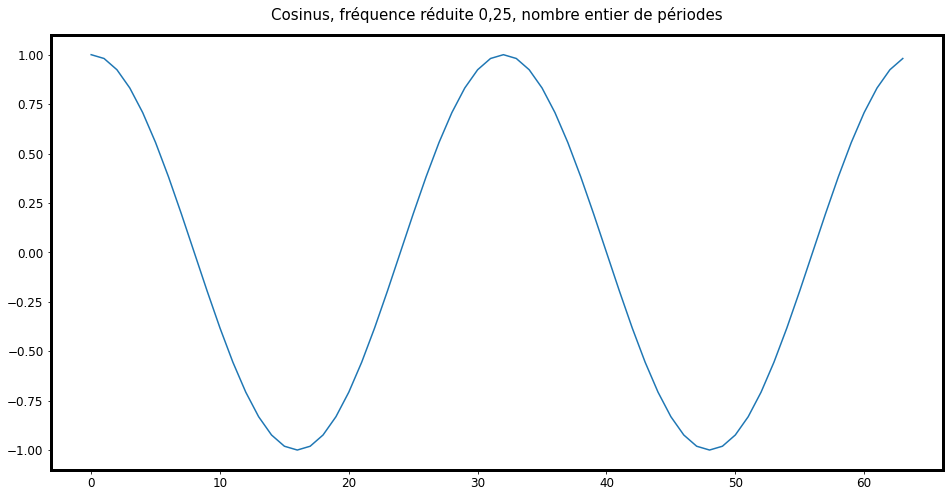

In [2]:
N = 64;

t1 = np.arange(0,N)
f = 2

x = np.cos(2*np.pi*f*t1/N);

plt.plot(t1, x); plt.title('Cosinus, fréquence réduite 0,25, nombre entier de périodes')
plt.show()

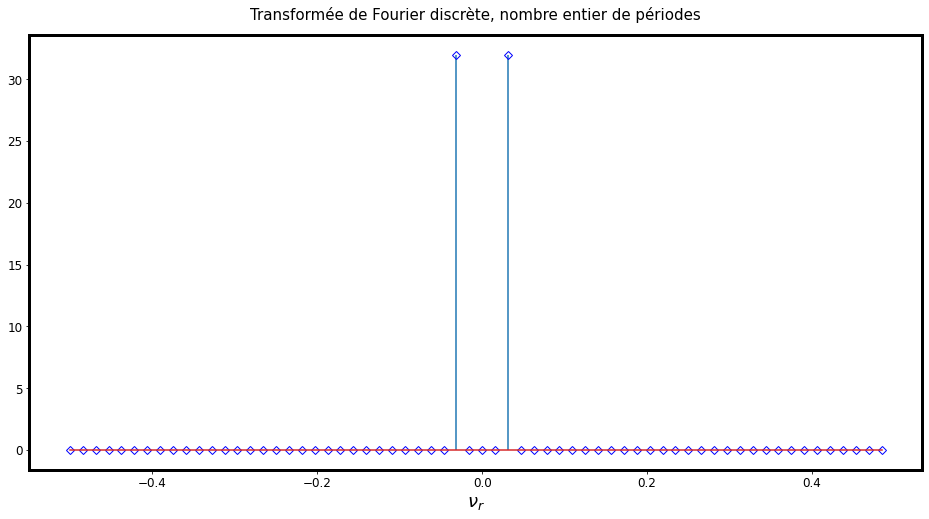

In [3]:
X = np.fft.fftshift(np.fft.fft(x))
nu = np.arange(0,len(x))/len(x)
nu[nu>=0.5] += -1
nu = np.fft.fftshift(nu);

markerline, stemlines, baseline = plt.stem(nu, abs(X),markerfmt='bD', use_line_collection=True)
markerline.set_markerfacecolor('none')
plt.xlabel('$\\nu_r$',fontsize=18)
plt.title('Transformée de Fourier discrète, nombre entier de périodes')
plt.show()

## Exemple 2

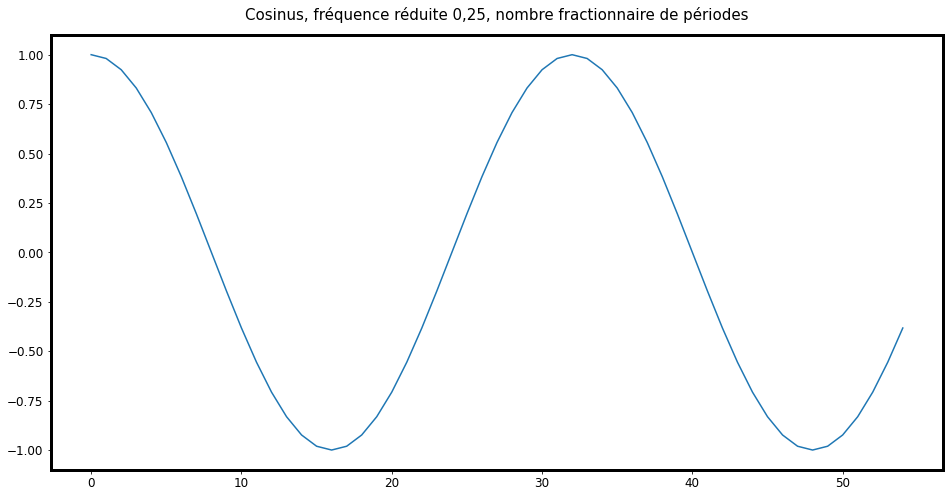

In [4]:
t2 = np.arange(0,N-9)
f = 2;

x2 = np.cos(2*np.pi*f*t2/N)

plt.plot(t2, x2); plt.title('Cosinus, fréquence réduite 0,25, nombre fractionnaire de périodes')
plt.show()

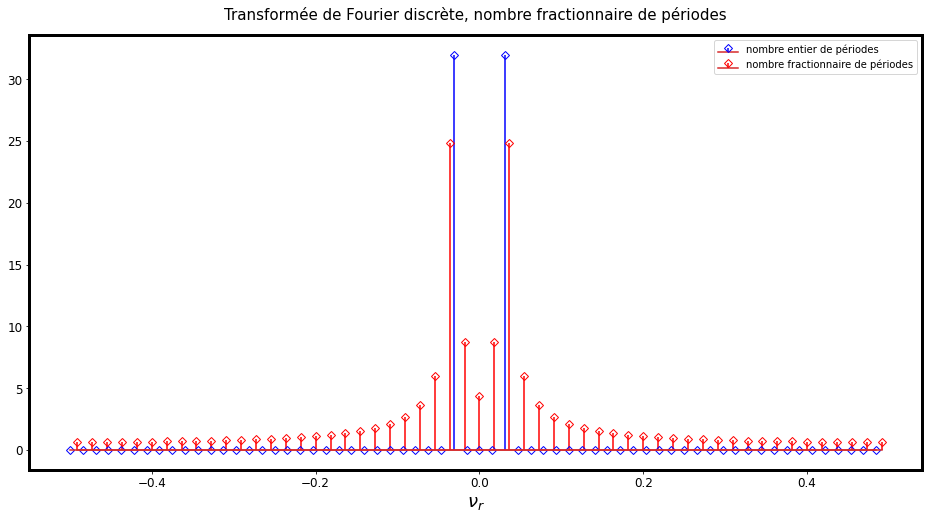

In [ ]:
X2 = np.fft.fftshift(np.fft.fft(x2));
nu2 = np.arange(0,len(x2))/len(x2)
nu2[nu2>=0.5] += -1
nu2 = np.fft.fftshift(nu2);


markerline, stemlines, baseline = plt.stem(nu, abs(X), 'b', markerfmt='bD', label='nombre entier de périodes', use_line_collection=True)
markerline.set_markerfacecolor('none')
markerline, stemlines, baseline = plt.stem(nu2, abs(X2), 'r', markerfmt='rD', label='nombre fractionnaire de périodes', use_line_collection=True)
markerline.set_markerfacecolor('none')

plt.xlabel('$\\nu_r$',fontsize=18)
plt.title('Transformée de Fourier discrète, nombre fractionnaire de périodes')
plt.legend()
plt.show()